## Exploratory Data Analysis - PLASsTiCC dataset

#### Inspired by Danilo da Silva

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_set = pd.read_csv('training_set.csv.zip')
train_md = pd.read_csv('training_set_metadata.csv')

### Training set metadata

#### Columns definition:

*  object_id: The object ID , unique identifier (given as int32 numbers).
*  ra: Right ascension, sky coordinate: longitude, units are degrees (given as float32 numbers):
*  decl: Declination, sky coordinate: latitude, units are degrees (given as float32 numbers).
*  gal_l: Galactic longitude, units are degrees (given as float32 numbers).
*  gal_b: Galactic latitude, units are degrees (given as float32 numbers).
*  ddf: A boolean flag to identify the object as coming from DDF survey area (ddf == 1 for the DDF).
*  hostgal_specz: The spectroscopic redshift of the source (given as float32 numbers).
*  hostgal_photoz: The photometric redshift of the host galaxy of the astronomical source (given as float32 numbers).
*  hostgal_photoz_err: The uncertainty on the hostgal_photoz (given as float32 numbers).
*  distmod: The distance (modulus) calculated from the hostgal_photoz since this redshift is given for all objects (given as float32 numbers).
*  MWEBV = MW E(B-V): This 'extinction' of light is a property of the Milky Way (MW) dust along the line of sight to the astronomical source, and is thus a function of the sky coordinates of the source ra, decl (given as float32 numbers).
*  target: The class of the astronomical source (given as int8 numbers).

In [3]:
train_md.describe()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
count,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,5523.000000,7848.000000,7848.000000
mean,4.810375e+07,169.719379,-27.254846,230.466784,-20.115526,0.269623,0.254436,0.357885,0.155695,41.263961,0.081953,60.895387
std,4.347364e+07,114.212761,20.248556,97.416392,40.390899,0.443792,0.330053,0.545552,0.300367,2.262711,0.150598,28.767984
min,6.150000e+02,0.175781,-64.760857,0.107681,-89.615573,0.000000,0.000000,0.000000,0.000000,31.996100,0.003000,6.000000
25%,3.180865e+05,62.402344,-44.597992,207.248509,-54.509752,0.000000,0.000000,0.000000,0.000000,39.845250,0.018000,42.000000
50%,4.131719e+07,150.996094,-27.279613,244.127187,-30.217582,0.000000,0.182750,0.210300,0.018000,41.167900,0.032000,65.000000
75%,8.665901e+07,282.875976,-8.838267,313.224277,16.913859,1.000000,0.350125,0.431200,0.122375,42.398550,0.076000,90.000000
max,1.307798e+08,359.824219,4.181528,359.943827,65.931317,1.000000,3.445100,2.999400,1.734800,47.025600,2.747000,95.000000


In [4]:
train_md.count()

object_id             7848
ra                    7848
decl                  7848
gal_l                 7848
gal_b                 7848
ddf                   7848
hostgal_specz         7848
hostgal_photoz        7848
hostgal_photoz_err    7848
distmod               5523
mwebv                 7848
target                7848
dtype: int64

#### Check for duplicate records

In [5]:
train_md.duplicated().sum() 

0

#### Check for NA values

In [6]:
train_md.isna().sum() 

object_id                0
ra                       0
decl                     0
gal_l                    0
gal_b                    0
ddf                      0
hostgal_specz            0
hostgal_photoz           0
hostgal_photoz_err       0
distmod               2325
mwebv                    0
target                   0
dtype: int64

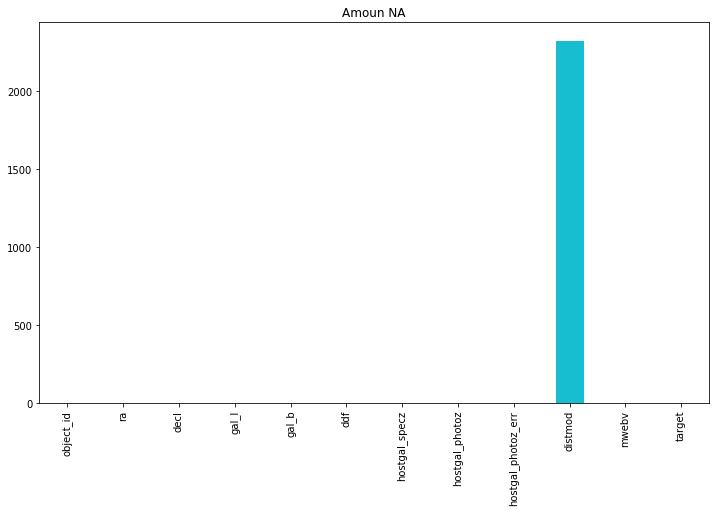

In [7]:
train_md.isna().sum().plot.bar(title = 'Amoun NA', figsize=(12,7))

#### Check rows with NA values

In [8]:
train_md[train_md.isnull().any(axis=1)].head() # Check rows with NA values

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
5,1227,35.683594,-5.379379,171.992947,-59.253501,1,0.0,0.0,0.0,NaN,0.020,65
9,1926,149.414062,1.940072,236.565366,41.393323,1,0.0,0.0,0.0,NaN,0.018,65
14,2624,346.655182,-63.260487,320.952196,-50.040935,1,0.0,0.0,0.0,NaN,0.019,65
15,2677,53.964844,-28.630989,225.142950,-53.813613,1,0.0,0.0,0.0,NaN,0.009,16


In [9]:
train_md_na = train_md[train_md.isnull().any(axis=1)]
train_md_na.describe() # Redshift is zero for every object with distmod = NaN

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
count,2.325000e+03,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.0,2325.0,2325.0,0.0,2325.000000,2325.000000
mean,5.099592e+07,174.686149,-26.806672,231.326938,-10.434551,0.232258,0.0,0.0,0.0,NaN,0.141224,44.315269
std,4.314808e+07,99.661991,20.263123,95.591558,35.899237,0.422364,0.0,0.0,0.0,NaN,0.227477,28.802371
min,6.150000e+02,0.189873,-64.760857,0.215743,-84.975785,0.000000,0.0,0.0,0.0,NaN,0.004000,6.000000
25%,4.037062e+06,101.250000,-43.406857,219.187676,-48.122744,0.000000,0.0,0.0,0.0,NaN,0.020000,16.000000
50%,4.711549e+07,151.171875,-26.944359,244.007733,-8.773774,0.000000,0.0,0.0,0.0,NaN,0.055000,65.000000
75%,8.825665e+07,256.640625,-7.933337,300.812032,17.529299,0.000000,0.0,0.0,0.0,NaN,0.146000,65.000000
max,1.307798e+08,359.814819,4.181528,359.943827,64.054506,1.000000,0.0,0.0,0.0,NaN,2.747000,92.000000


As we can see, all of these objects have no redshift value (hostgal_specz, hostgal_photoz). 
According to the dataset introduction file, "the given redshift for objects in our own Milky Way galaxy is given as zero". so this objects are within our Milky Way.

We can create a new boolean variable called 'galactic' to identify objects from our galaxy.

In [10]:
train_md['galactic'] = train_md[['distmod']].isna()

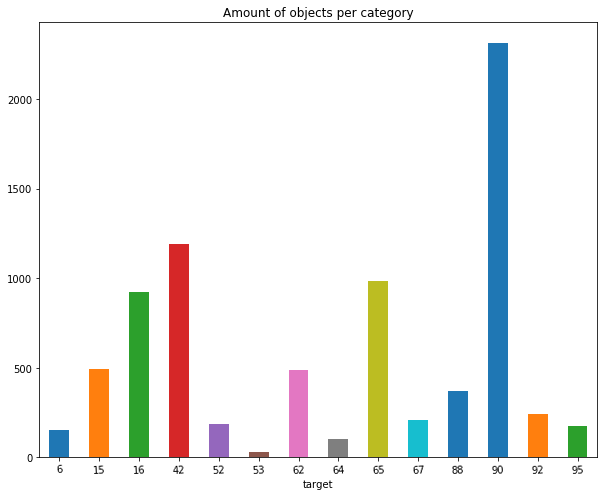

In [11]:
train_md.groupby(['target']).size().plot.bar(title = 'Amount of objects per category', figsize=(10,8), rot = 3)

#### Galactic coordinates

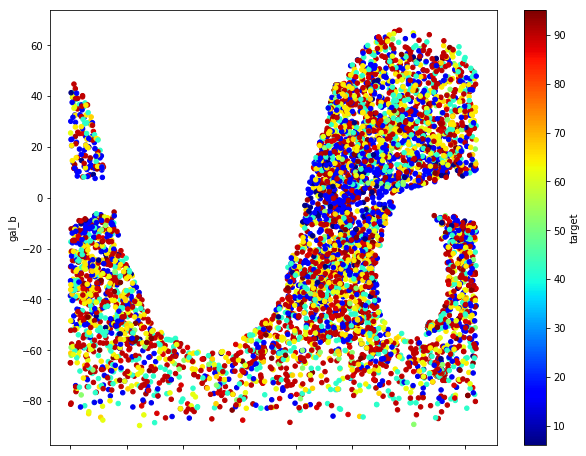

In [12]:
#How objects are distributed in the galaxy using galactic coordinates
train_md.plot.scatter(x = 'gal_l', y = 'gal_b', c = 'target', colormap='jet',figsize=(10,8))

#### Sky coordinates

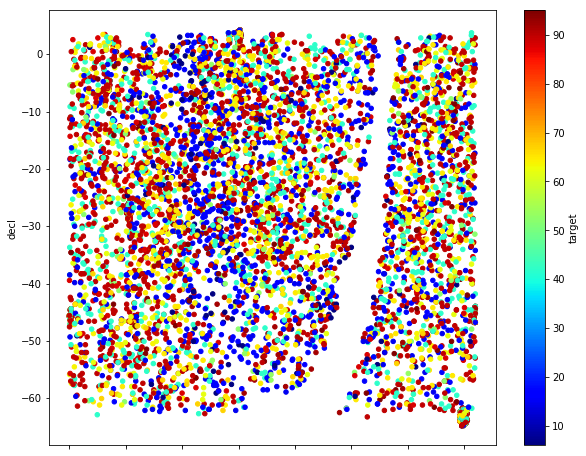

In [13]:
#How objects are distribitued in the galaxy with sky coordinates
train_md.plot.scatter(x = 'ra', y = 'decl', c = 'target', colormap = 'jet', figsize = (10,8))

#### Amount of objects per category in DDF

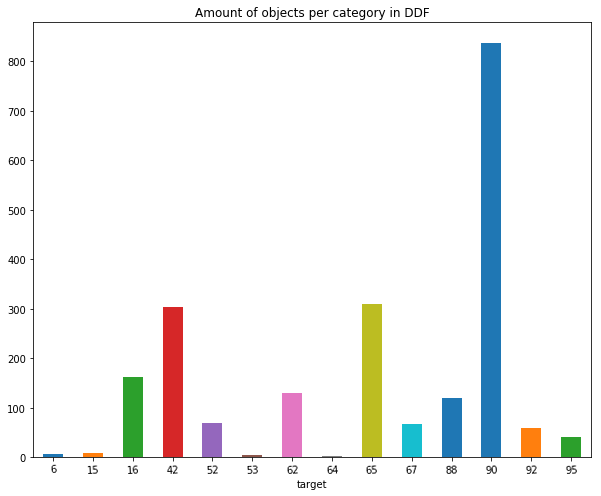

In [14]:
train_md.loc[train_md['ddf'] == 1].groupby(['target']).size().plot.bar(title = 'Amount of objects per category in DDF', figsize=(10,8), rot = 3)

#### Redshift

Text(0.5,0.98,'')

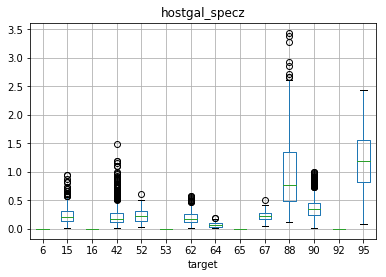

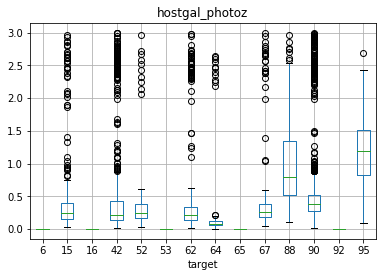

In [15]:
# Spectroscopic redshift
train_md.boxplot(column = 'hostgal_specz', by = 'target')
plt.suptitle("")
#Photometric redshift
train_md.boxplot(column = 'hostgal_photoz', by = 'target')
plt.suptitle("")

As we can see, we can use redshift to identify some objects.

#### The uncertainty on the photometric redshift

Text(0.5,0.98,'')

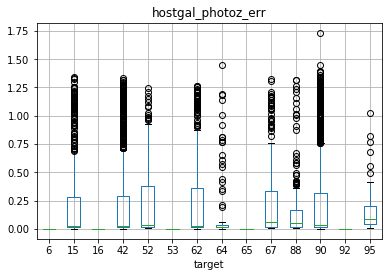

In [16]:
train_md.boxplot(column = 'hostgal_photoz_err', by = 'target')
plt.suptitle("")

#### Distance (modulus) from 

Text(0.5,0.98,'')

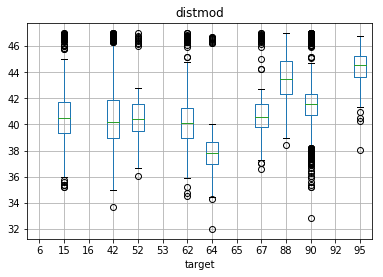

In [17]:
# We expect smae distribution from distmod (distance(modulus)) than from photometrics 

train_md.boxplot(column = 'distmod', by = 'target')
plt.suptitle("")

#### Objects that only exits in our galaxy (Redshift = 0)

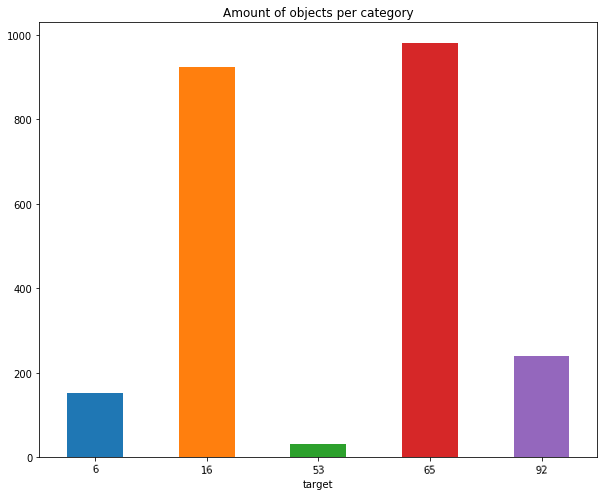

In [18]:
train_md.loc[train_md['galactic'] == 1].groupby(['target']).size().plot.bar(title = 'Amount of objects per category', figsize=(10,8), rot = 3)

### Training set

#### Columns definition:

*  object_id: Same key as the metadata table (given as int32 numbers):
*  mjd: The time in Modified Julian Date of the obervation. Defined to have a starting point of midnight on November 17, 1858. The MJD can be converted to Unix epoch time with the formula unix_time = (MJD40587)86400. The units are days (given as float64 numbers).
*  passband: The specific LSST passband integer, such that u, g, r, i, z, y = 0, 1, 2, 3, 4, 5 in which it was viewed (given as int8 numbers).
*  flux: The measured flux (brightness) in the passband of obervation as listed in the passband columns. The flux is corrected to MWEBV.
*  flux_err: The uncertainty on the measurenment of the flux listed above (given as float32 numbers).
*  detected: If detected == 1, the object's brightness is significantly different at the 3σ level relative to the reference template.  

In [19]:
train_set.describe()

,object_id,mjd,passband,flux,flux_err,detected
count,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06
mean,3.392608e+07,6.017921e+04,2.783108e+00,2.468855e+01,2.548932e+01,1.666168e-01
std,4.258439e+07,3.092379e+02,1.703946e+00,3.684506e+03,3.814492e+03,3.726336e-01
min,6.150000e+02,5.958003e+04,0.000000e+00,-1.149388e+06,4.637530e-01,0.000000e+00
25%,1.843400e+05,5.989905e+04,1.000000e+00,-2.789418e+00,2.118670e+00,0.000000e+00
50%,4.548783e+06,6.019331e+04,3.000000e+00,7.331990e-01,4.708105e+00,0.000000e+00
75%,6.796280e+07,6.048722e+04,4.000000e+00,8.830932e+00,1.297371e+01,0.000000e+00
max,1.307798e+08,6.067436e+04,5.000000e+00,2.432809e+06,2.234069e+06,1.000000e+00


We will merge both tables into one

In [20]:
train_complete = pd.merge(train_md, train_set, on = 'object_id')
train_complete.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,galactic,mjd,passband,flux,flux_err,detected
0,615,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92,True,59750.4229,2,-544.810303,3.622952,1
1,615,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92,True,59750.4306,1,-816.434326,5.553370,1
2,615,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92,True,59750.4383,3,-471.385529,3.801213,1
3,615,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92,True,59750.4450,4,-388.984985,11.395031,1
4,615,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92,True,59752.4070,2,-681.858887,4.041204,1


#### Passband brightness over time

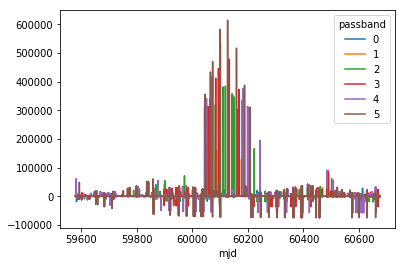

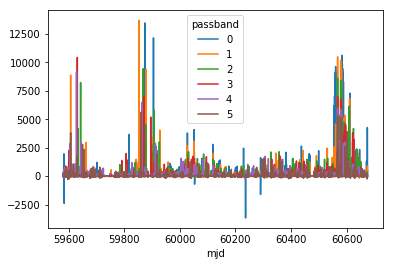

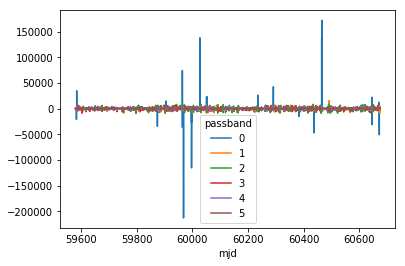

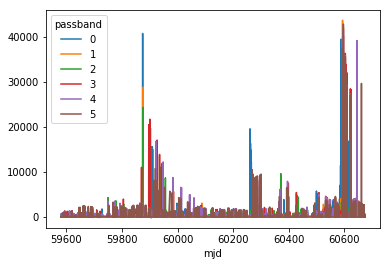

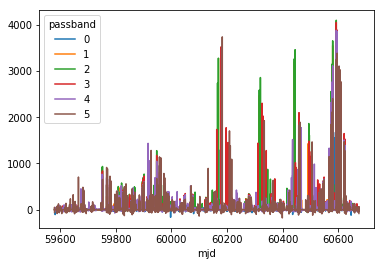

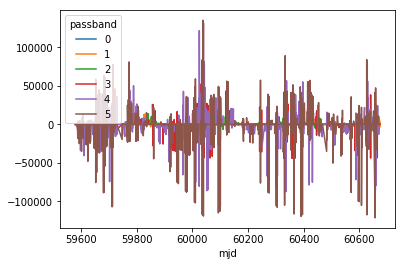

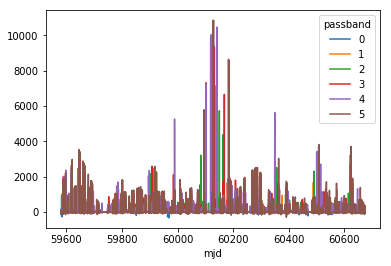

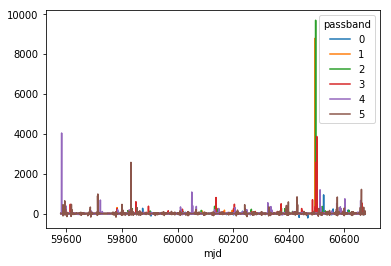

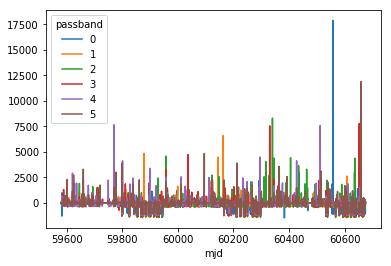

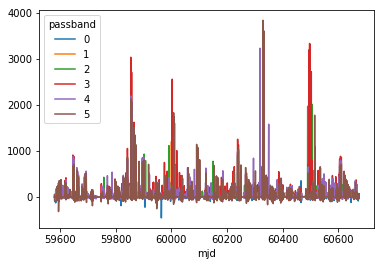

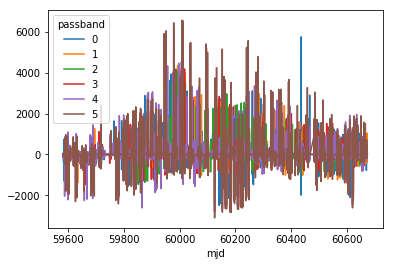

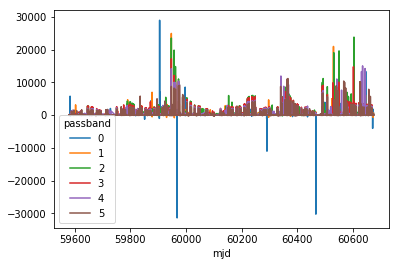

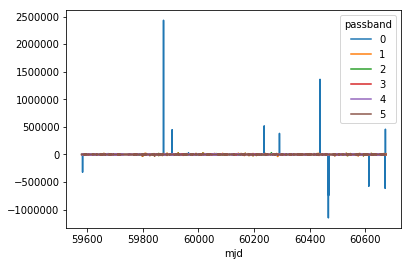

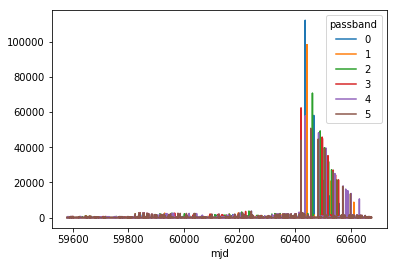

In [21]:
df6 = train_complete.loc[train_complete['target']==6].pivot_table(index='mjd', columns='passband', values='flux', aggfunc='sum',
                     fill_value=0)

df15 = train_complete.loc[train_complete['target']==15].pivot_table(index='mjd', columns='passband', values='flux', aggfunc='sum',
                     fill_value=0)

df16 = train_complete.loc[train_complete['target']==16].pivot_table(index='mjd', columns='passband', values='flux', aggfunc='sum',
                     fill_value=0)

df42 = train_complete.loc[train_complete['target']==42].pivot_table(index='mjd', columns='passband', values='flux', aggfunc='sum',
                     fill_value=0)

df52 = train_complete.loc[train_complete['target']==52].pivot_table(index='mjd', columns='passband', values='flux', aggfunc='sum',
                     fill_value=0)

df53 = train_complete.loc[train_complete['target']==53].pivot_table(index='mjd', columns='passband', values='flux', aggfunc='sum',
                     fill_value=0)

df62 = train_complete.loc[train_complete['target']==62].pivot_table(index='mjd', columns='passband', values='flux', aggfunc='sum',
                     fill_value=0)

df64 = train_complete.loc[train_complete['target']==64].pivot_table(index='mjd', columns='passband', values='flux', aggfunc='sum',
                     fill_value=0)

df65 = train_complete.loc[train_complete['target']==65].pivot_table(index='mjd', columns='passband', values='flux', aggfunc='sum',
                     fill_value=0)

df67 = train_complete.loc[train_complete['target']==67].pivot_table(index='mjd', columns='passband', values='flux', aggfunc='sum',
                     fill_value=0)

df88 = train_complete.loc[train_complete['target']==88].pivot_table(index='mjd', columns='passband', values='flux', aggfunc='sum',
                     fill_value=0)

df90 = train_complete.loc[train_complete['target']==90].pivot_table(index='mjd', columns='passband', values='flux', aggfunc='sum',
                     fill_value=0)

df92 = train_complete.loc[train_complete['target']==92].pivot_table(index='mjd', columns='passband', values='flux', aggfunc='sum',
                     fill_value=0)

df95 = train_complete.loc[train_complete['target']==95].pivot_table(index='mjd', columns='passband', values='flux', aggfunc='sum',
                     fill_value=0)

df6.plot()
df15.plot()
df16.plot()
df42.plot()
df52.plot()
df53.plot()
df62.plot()
df64.plot()
df65.plot()
df67.plot()
df88.plot()
df90.plot()
df92.plot()
df95.plot()

#### Uncertainty measurement of flux

Text(0.5,0.98,'')

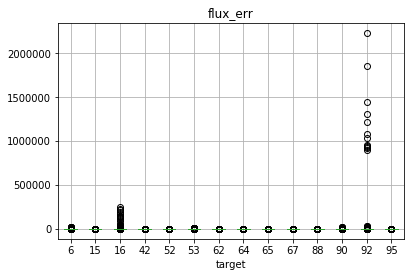

In [22]:
train_complete.boxplot(column = 'flux_err', by = 'target')
plt.suptitle("")

The same but breaking the data into isolated passbands

Text(0.5,0.98,'')

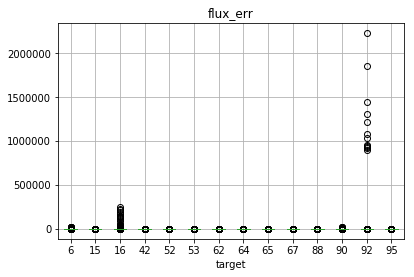

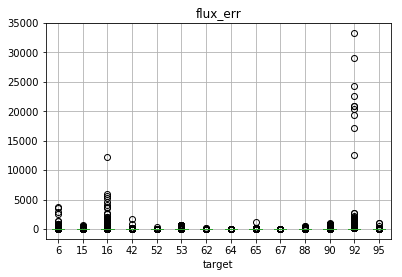

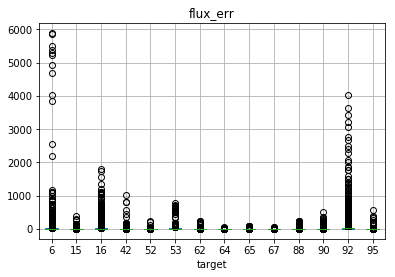

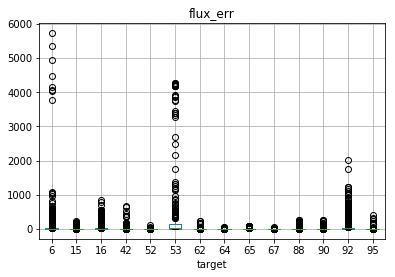

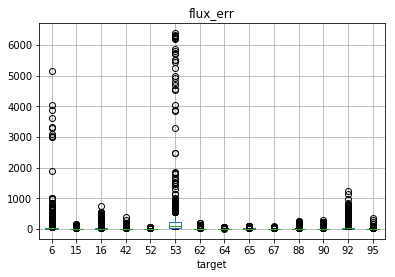

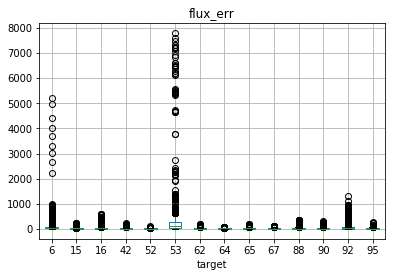

In [23]:
# Flux uncertainty in each passband

train_complete.loc[train_complete['passband'] == 0].boxplot(column = 'flux_err', by = 'target')
plt.suptitle("")
train_complete.loc[train_complete['passband'] == 1].boxplot(column = 'flux_err', by = 'target')
plt.suptitle("")
train_complete.loc[train_complete['passband'] == 2].boxplot(column = 'flux_err', by = 'target')
plt.suptitle("")
train_complete.loc[train_complete['passband'] == 3].boxplot(column = 'flux_err', by = 'target')
plt.suptitle("")
train_complete.loc[train_complete['passband'] == 4].boxplot(column = 'flux_err', by = 'target')
plt.suptitle("")
train_complete.loc[train_complete['passband'] == 5].boxplot(column = 'flux_err', by = 'target')
plt.suptitle("")

#### Amount of objects 'detected' per target

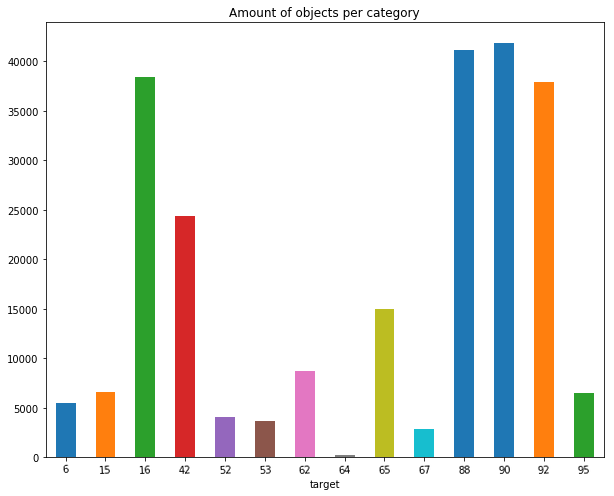

In [24]:
train_complete.loc[train_complete['detected'] == 1].groupby(['target']).size().plot.bar(title = 'Amount of objects per category', figsize=(10,8), rot = 3)

#### Correlation plot

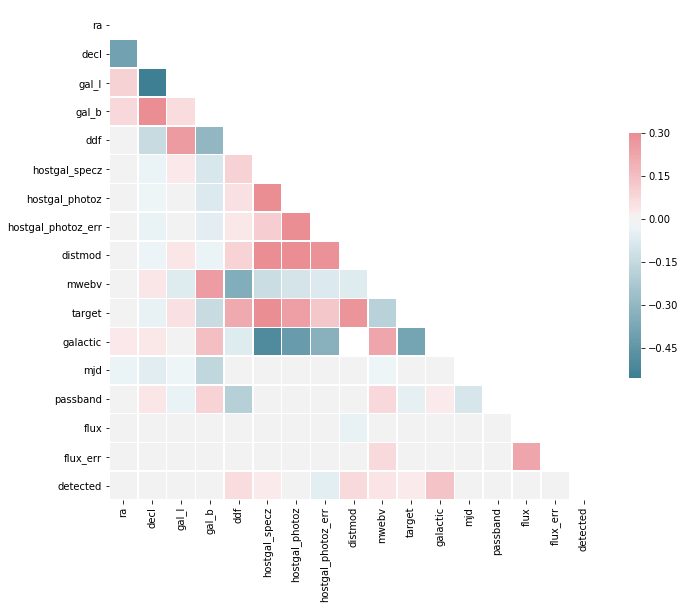

In [25]:
# Compute the correlation matrix
corr = train_complete.iloc[:, 1:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})